In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

colors = ["#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6"]

In [2]:
df = pd.read_csv("./file.csv")
df.head()

,Unnamed: 0,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,...,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
0,0,17850.0,M,Chicago,12.0,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
1,1,17850.0,M,Chicago,12.0,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
2,2,17850.0,M,Chicago,12.0,16696.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,...,122.77,6.5,Not Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
3,3,17850.0,M,Chicago,12.0,16699.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,...,81.50,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
4,4,17850.0,M,Chicago,12.0,16700.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0


In [3]:
df.shape

(52955, 21)

In [4]:
df.isna().sum()

Unnamed: 0               0
CustomerID              31
Gender                  31
Location                31
Tenure_Months           31
Transaction_ID          31
Transaction_Date        31
Product_SKU             31
Product_Description     31
Product_Category         0
Quantity                31
Avg_Price               31
Delivery_Charges        31
Coupon_Status           31
GST                     31
Date                    31
Offline_Spend           31
Online_Spend            31
Month                    0
Coupon_Code            400
Discount_pct           400
dtype: int64

In [5]:
df["Coupon_Code"] = df["Coupon_Code"].fillna(0)
df["Discount_pct"] = df["Discount_pct"].fillna(0)
df = df.drop("Unnamed: 0",axis=1)

In [6]:
df.isna().sum()

CustomerID             31
Gender                 31
Location               31
Tenure_Months          31
Transaction_ID         31
Transaction_Date       31
Product_SKU            31
Product_Description    31
Product_Category        0
Quantity               31
Avg_Price              31
Delivery_Charges       31
Coupon_Status          31
GST                    31
Date                   31
Offline_Spend          31
Online_Spend           31
Month                   0
Coupon_Code             0
Discount_pct            0
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df.isna().sum()

CustomerID             0
Gender                 0
Location               0
Tenure_Months          0
Transaction_ID         0
Transaction_Date       0
Product_SKU            0
Product_Description    0
Product_Category       0
Quantity               0
Avg_Price              0
Delivery_Charges       0
Coupon_Status          0
GST                    0
Date                   0
Offline_Spend          0
Online_Spend           0
Month                  0
Coupon_Code            0
Discount_pct           0
dtype: int64

Total number of unique customers

In [94]:
total_customers = df["CustomerID"].unique().size
print(f"There are total of {total_customers} unique customers.")

There are total of 1468 unique customers.


Total number of unique products

In [95]:
total_products = df["Product_SKU"].unique().size
print(f"There are total of {total_products} unique products.")

There are total of 1145 unique products.


Unique product categories

In [96]:
product_categories = df["Product_Category"].unique()
print(f"Unique product categories are {product_categories}")

Unique product categories are ['Nest-USA' 'Office' 'Apparel' 'Bags' 'Drinkware' 'Lifestyle' 'Waze'
 'Headgear' 'Fun' 'Notebooks & Journals' 'Google' 'Nest-Canada' 'Bottles'
 'Gift Cards' 'More Bags' 'Backpacks' 'Housewares' 'Android' 'Nest'
 'Accessories']


Distribution of product categories

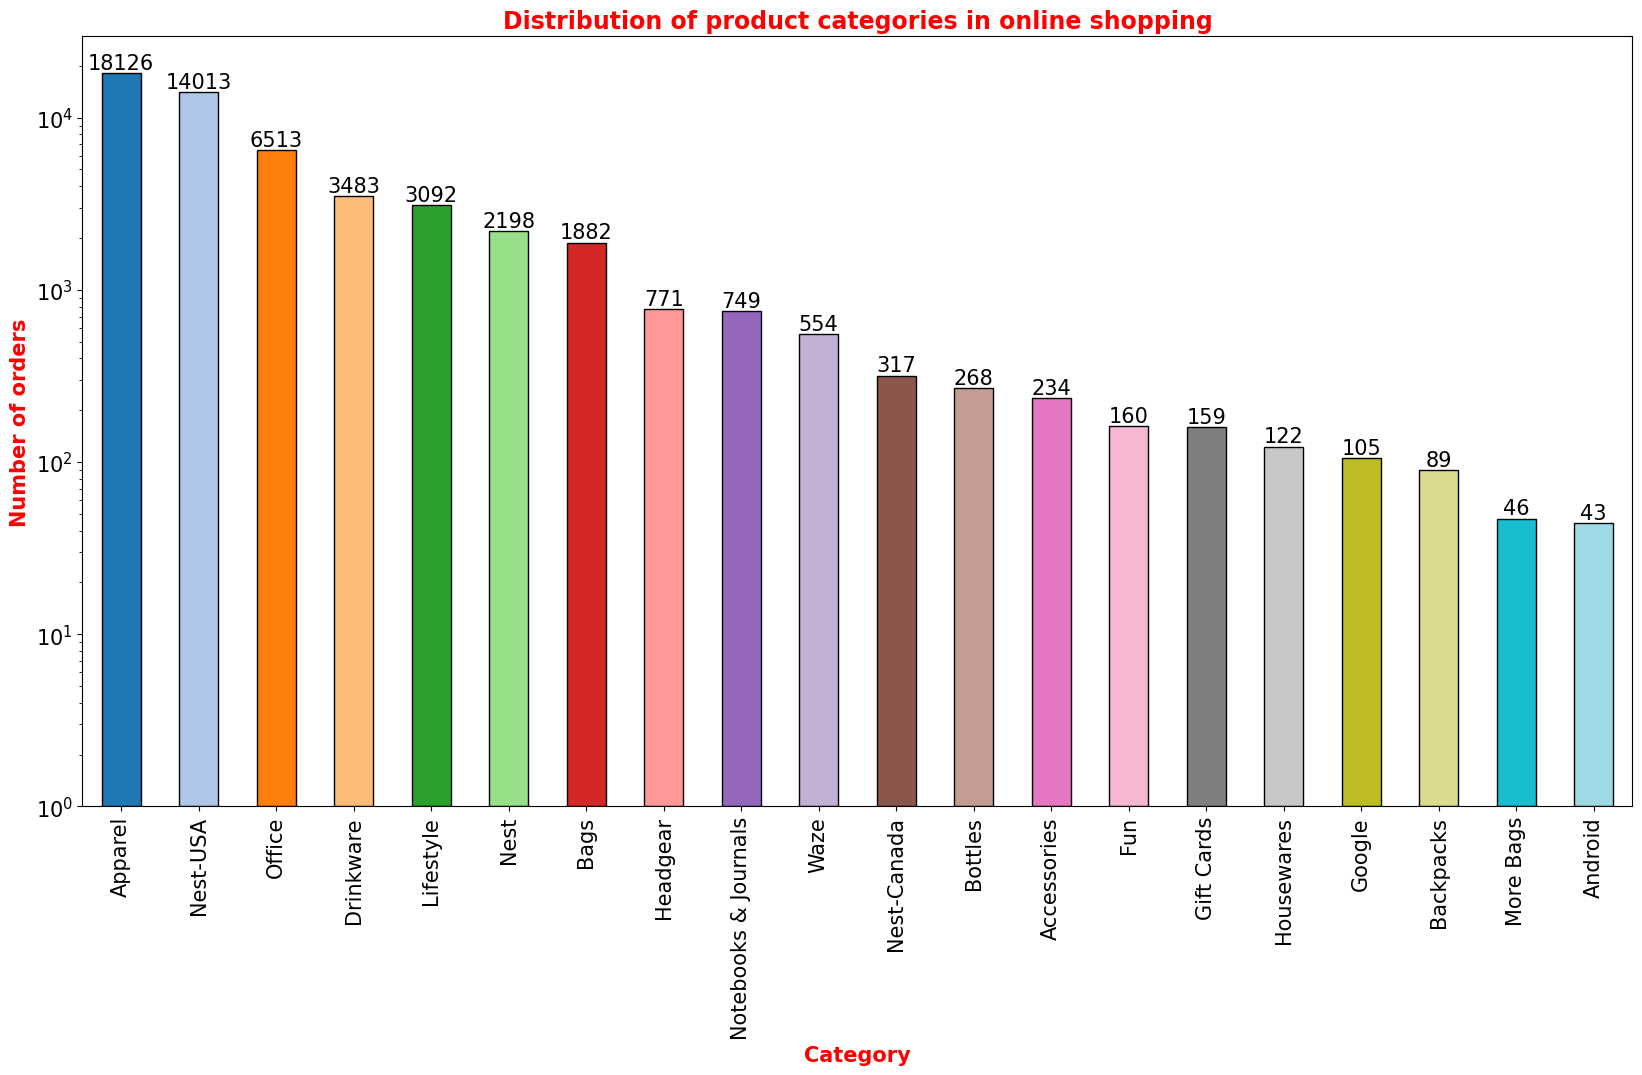

In [110]:
plt.figure(figsize=(20,10))

ax = df["Product_Category"].value_counts().plot(kind="bar",color=sns.color_palette("tab20"),edgecolor="black",log=True)

for p in ax.patches:
    ax.annotate(int(p.get_height()),(p.get_x()+0.25,p.get_height()+1),ha="center",va="bottom",color="black",fontsize=15)
    ax.tick_params("both",labelsize=15)

plt.xlabel("Category",weight="bold",color="#FF0000",fontsize=15)
plt.ylabel("Number of orders",weight="bold",color="#FF0000",fontsize=15)
plt.title("Distribution of product categories in online shopping",weight="bold",color="#FF0000",fontsize=17)
plt.show()

Distribution of Gender

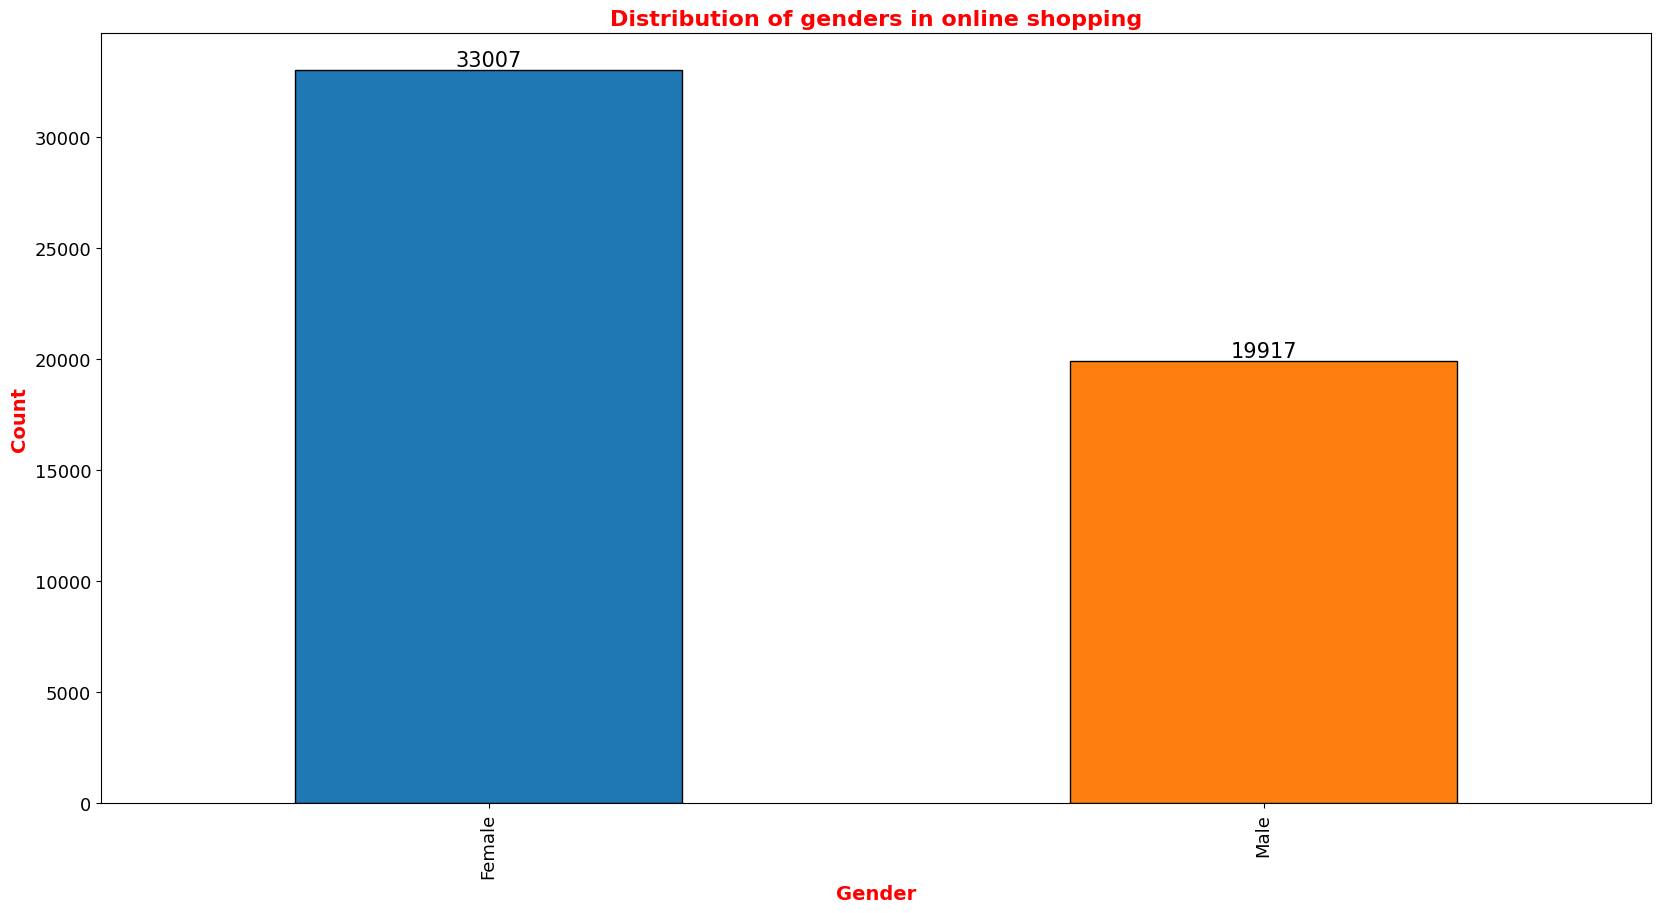

In [109]:
plt.figure(figsize=(20,10))

ax = df["Gender"].value_counts().plot(kind="bar",color=sns.color_palette("tab10"),edgecolor="black")
ax.set_xticklabels(["Female","Male"])

for p in ax.patches:
    ax.annotate(int(p.get_height()),(p.get_x()+0.25,p.get_height()+1),va="bottom",ha="center",color="black",fontsize=15)
    ax.tick_params("both",labelsize=13)

plt.xlabel("Gender",weight="bold",color="#FF0000",fontsize=14)
plt.ylabel("Count",weight="bold",color="#FF0000",fontsize=14)
plt.title("Distribution of genders in online shopping",weight="bold",color="#FF0000",fontsize=16)
plt.show()

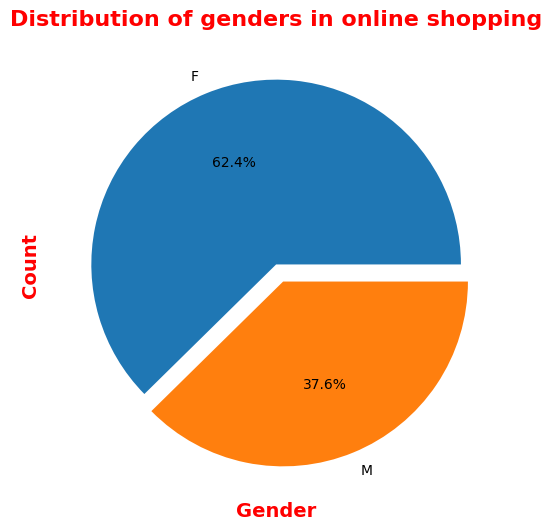

In [108]:
plt.figure(figsize=(10,6))

explode = (0,0.1)
df["Gender"].value_counts().plot(kind="pie",explode=explode,autopct="%1.1f%%")

plt.xlabel("Gender",weight="bold",color="#FF0000",fontsize=14)
plt.ylabel("Count",weight="bold",color="#FF0000",fontsize=14)
plt.title("Distribution of genders in online shopping",weight="bold",color="#FF0000",fontsize=16)
plt.show()

What is the average tenure of customers on the platform?

In [107]:
average_tenure = df[["CustomerID","Tenure_Months"]].groupby("CustomerID").mean().reset_index()["Tenure_Months"].mean()
print(f"The average tenure for customers is {round(average_tenure,2)} months.")

The average tenure for customers is 25.91 months.


In [12]:
df["Location"].value_counts().sort_values(ascending=False)

Location
Chicago          18380
California       16136
New York         11173
New Jersey        4503
Washington DC     2732
Name: count, dtype: int64

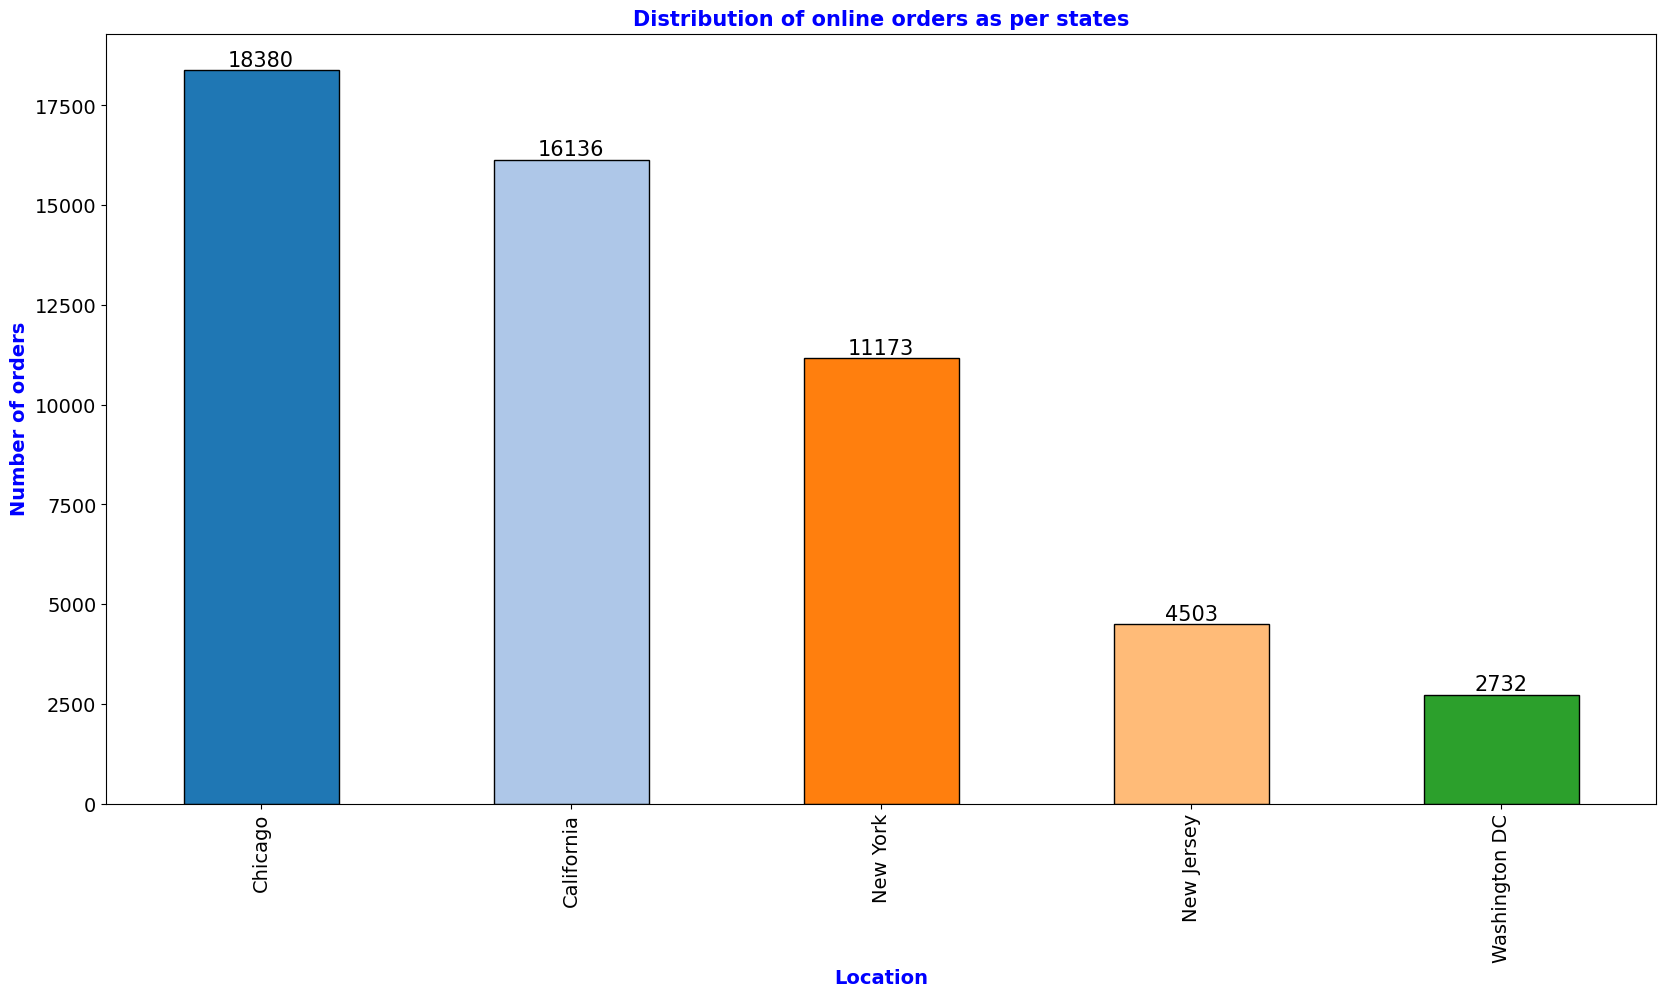

In [13]:
plt.figure(figsize=(20,10))

ax = df["Location"].value_counts().plot(kind="bar",color=sns.color_palette("tab20"),edgecolor="black")

for p in ax.patches:
    ax.annotate(int(p.get_height()),(p.get_x()+0.25,p.get_height()+1),ha="center",va="bottom",color="black",fontsize=15)
    ax.tick_params("both",labelsize=14)

plt.xlabel("Location",weight="bold",fontsize=14,color="#0000FF")
plt.ylabel("Number of orders",weight="bold",fontsize=14,color="#0000FF")
plt.title("Distribution of online orders as per states",weight="bold",fontsize=15,color="#0000FF")
plt.show()

Boxplot for offline vs online spend

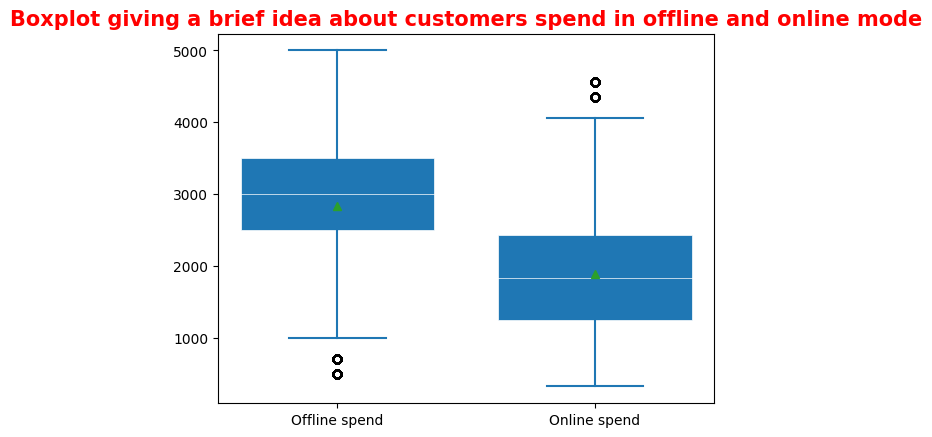

In [15]:
fig, ax = plt.subplots()

ax.boxplot((df["Offline_Spend"],df["Online_Spend"]),positions=[2,4],widths=1.5,patch_artist=True,
            showmeans=True,showfliers=True,
            medianprops={"color": "white", "linewidth": 0.5},
            boxprops={"facecolor": "C0", "edgecolor": "white",
                        "linewidth": 0.5},
            whiskerprops={"color": "C0", "linewidth": 1.5},
            capprops={"color": "C0", "linewidth": 1.5}   
        )
ax.set_xticklabels(["Offline spend","Online spend"])
plt.title("Boxplot giving a brief idea about customers spend in offline and online mode",weight="bold",fontsize=15,color="#FF0000")
plt.show()

Distribution of orders according to the months

In [16]:
import calendar
df["Month"] = df["Month"].apply(lambda x: calendar.month_name[x])


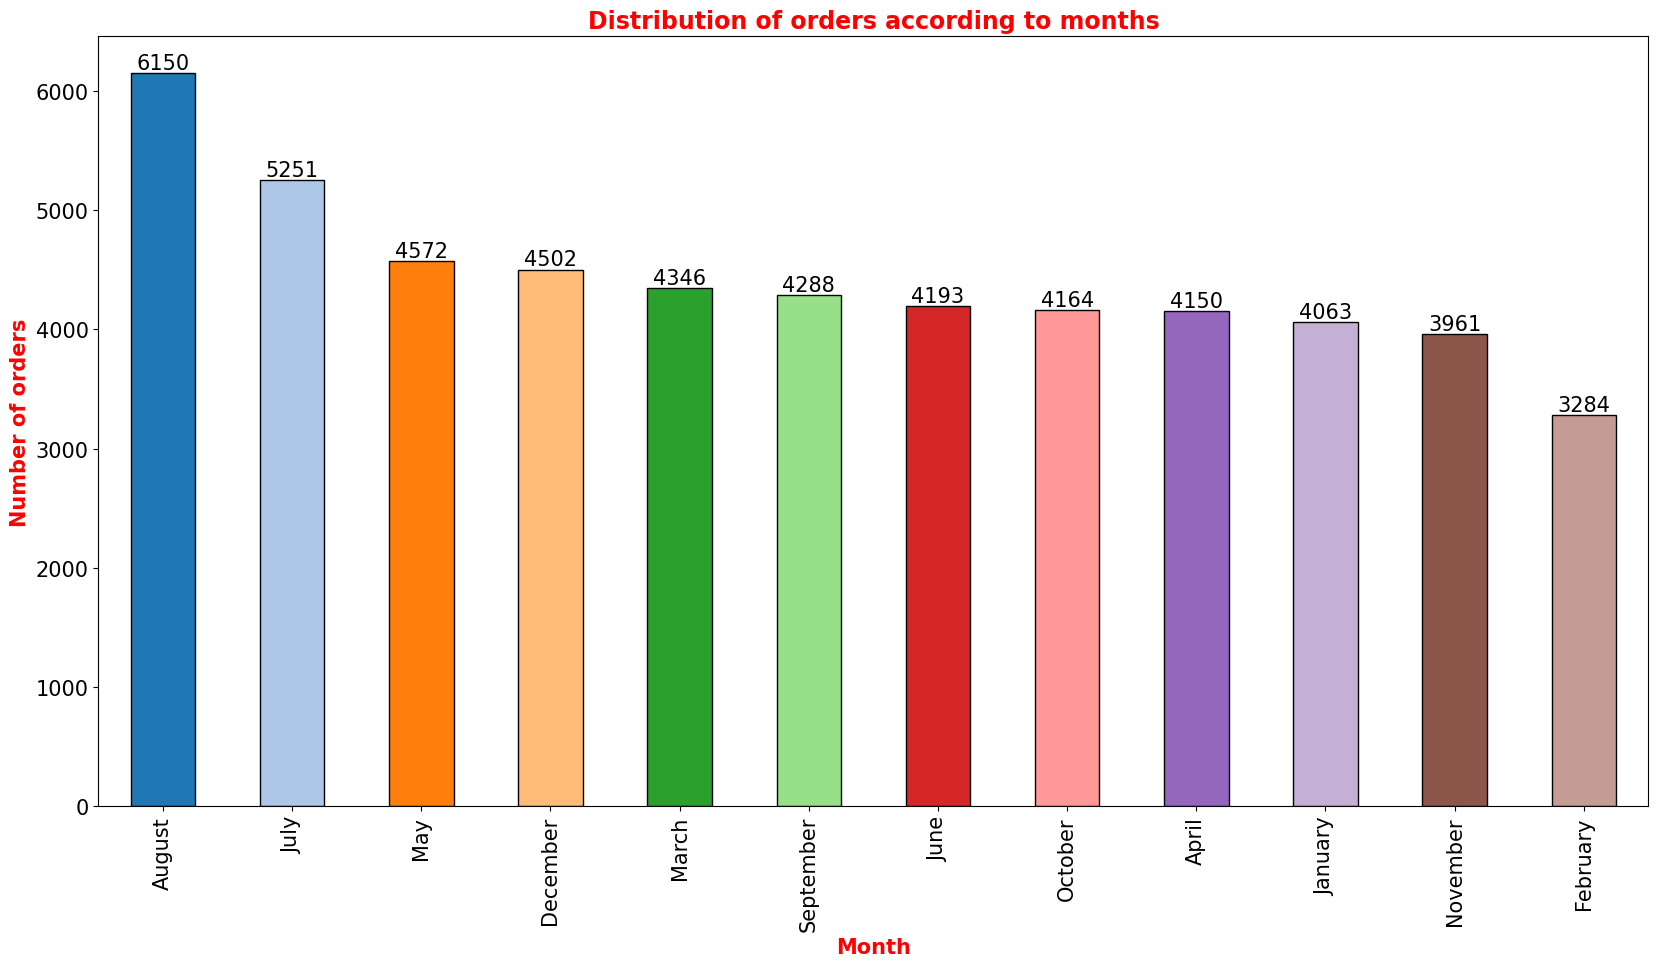

In [17]:
plt.figure(figsize=(20,10))

ax = df["Month"].value_counts().plot(kind="bar",color=sns.color_palette("tab20"),edgecolor="black")

for p in ax.patches:
    ax.annotate(int(p.get_height()),(p.get_x()+0.25,p.get_height()+1),ha="center",va="bottom",color="black",fontsize=15)
    ax.tick_params("both",labelsize=15)

plt.xlabel("Month",weight="bold",color="#FF0000",fontsize=15)
plt.ylabel("Number of orders",weight="bold",color="#FF0000",fontsize=15)
plt.title("Distribution of orders according to months",weight="bold",color="#FF0000",fontsize=17)
plt.show()

In [18]:
df.columns

Index(['CustomerID', 'Gender', 'Location', 'Tenure_Months', 'Transaction_ID',
       'Transaction_Date', 'Product_SKU', 'Product_Description',
       'Product_Category', 'Quantity', 'Avg_Price', 'Delivery_Charges',
       'Coupon_Status', 'GST', 'Date', 'Offline_Spend', 'Online_Spend',
       'Month', 'Coupon_Code', 'Discount_pct'],
      dtype='object')

In [19]:
# Considering total spend per order = avg_price*quantity + delivery_charges - (avg_price*quantity*Discount_pct/100)
df["Total_order_spend"] = df["Avg_Price"]*df["Quantity"] + df["Delivery_Charges"] - (df["Avg_Price"]*df["Quantity"]*df["Discount_pct"])/100

In [22]:
df[["Avg_Price","Quantity","Delivery_Charges","Discount_pct","Total_order_spend"]]

,Avg_Price,Quantity,Delivery_Charges,Discount_pct,Total_order_spend
0,153.71,1.0,6.5,10.0,144.839
1,153.71,1.0,6.5,10.0,144.839
2,122.77,2.0,6.5,10.0,227.486
3,81.50,1.0,6.5,10.0,79.850
4,153.71,1.0,6.5,10.0,144.839
...,...,...,...,...,...
52919,250.00,1.0,0.0,30.0,175.000
52920,25.00,1.0,0.0,30.0,17.500
52921,10.80,1.0,6.0,10.0,15.720
52922,9.60,1.0,6.0,10.0,14.640


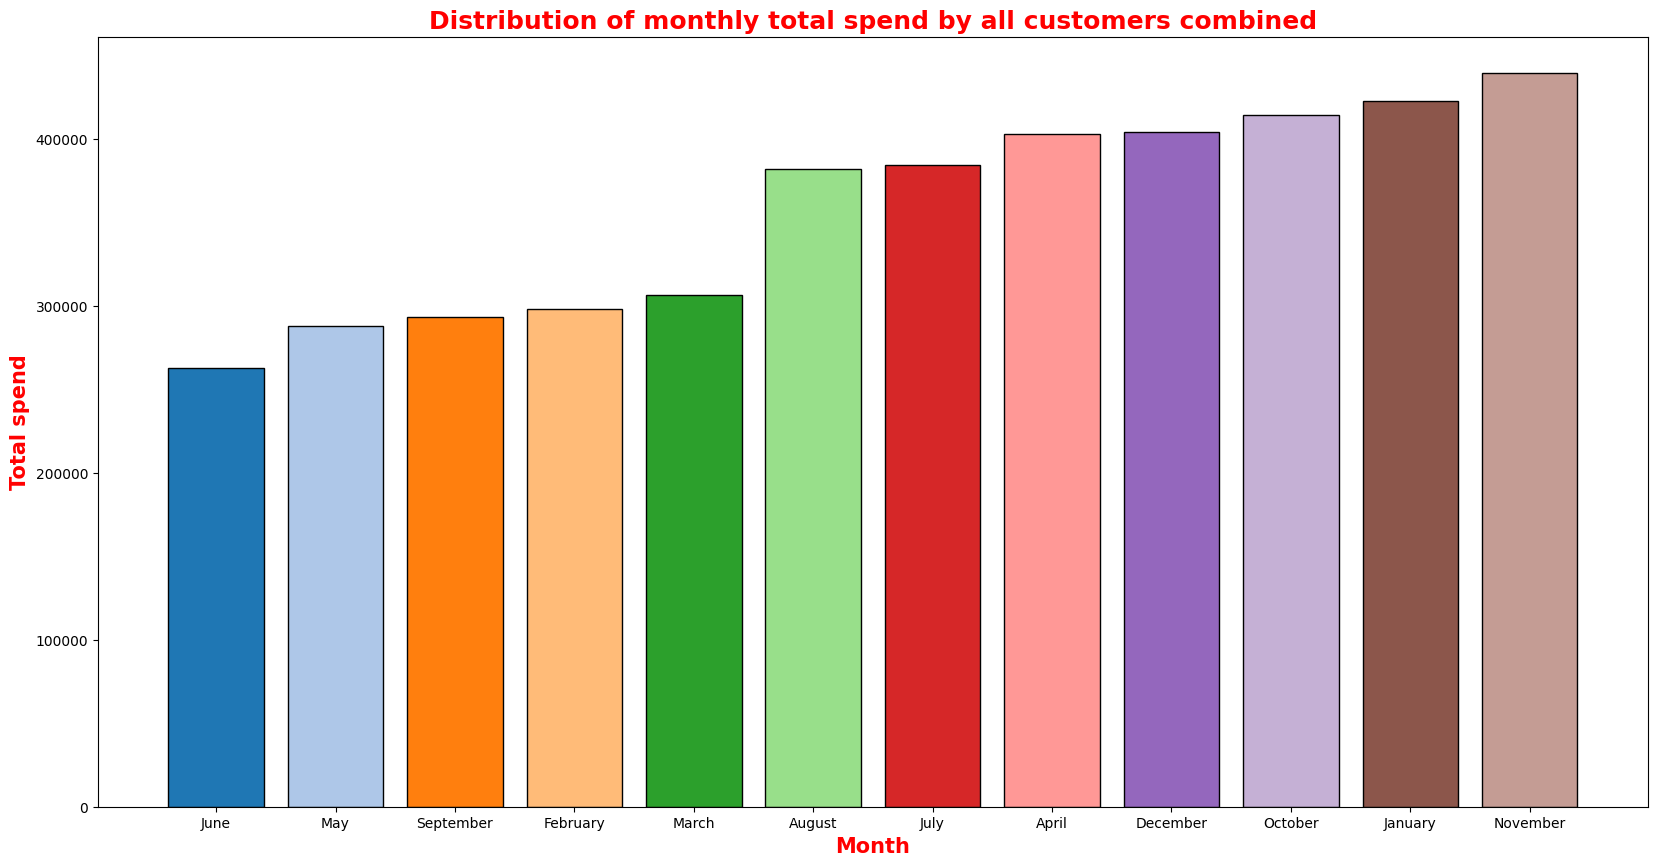

In [29]:
# Monthly spend
monthly_spend = df[["Total_order_spend","Month"]].groupby("Month").sum().sort_values(by="Total_order_spend",ascending=True).reset_index()

plt.figure(figsize=(20,10))

ax = plt.bar(monthly_spend["Month"],monthly_spend["Total_order_spend"],edgecolor="black",color=sns.color_palette("tab20"))

plt.xlabel("Month",weight="bold",color="#FF0000",fontsize=15)
plt.ylabel("Total spend",weight="bold",color="#FF0000",fontsize=15)
plt.title("Distribution of monthly total spend by all customers combined",weight="bold",color="#FF0000",fontsize=18)
plt.show()

Month with the highest spend

In [31]:
monthly_spend.iloc[-1]

Month                  November
Total_order_spend    439538.018
Name: 11, dtype: object

Month with the lowest spend

In [32]:
monthly_spend.iloc[0]

Month                      June
Total_order_spend    262870.435
Name: 0, dtype: object

Average spend overall

In [33]:
np.array(monthly_spend["Total_order_spend"]).mean()

358455.95391666674

Distribution of Discount Pct

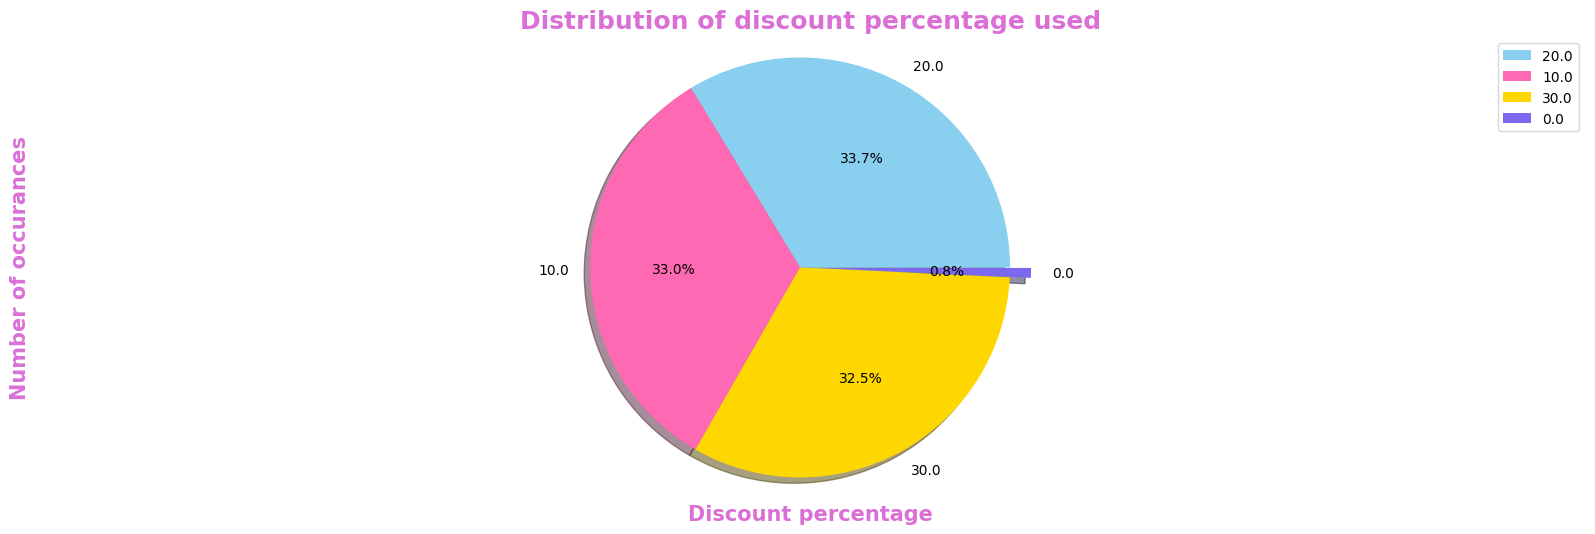

In [53]:
plt.figure(figsize=(20,6))

explode = (0,0,0,0.1)
ax = df["Discount_pct"].value_counts().plot(kind="pie",colors=colors,explode=explode,autopct="%1.1f%%",shadow=True)

plt.xlabel("Discount percentage",weight="bold",color=colors[-1],fontsize=15)
plt.ylabel("Number of occurances",weight="bold",color=colors[-1],fontsize=15)
plt.title("Distribution of discount percentage used",weight="bold",color=colors[-1],fontsize=18)
plt.legend(labels=df["Discount_pct"].value_counts().index,loc="best")
plt.axis("equal")

plt.show()

In [54]:
df.columns

Index(['CustomerID', 'Gender', 'Location', 'Tenure_Months', 'Transaction_ID',
       'Transaction_Date', 'Product_SKU', 'Product_Description',
       'Product_Category', 'Quantity', 'Avg_Price', 'Delivery_Charges',
       'Coupon_Status', 'GST', 'Date', 'Offline_Spend', 'Online_Spend',
       'Month', 'Coupon_Code', 'Discount_pct', 'Total_order_spend'],
      dtype='object')

Customers with the highest spend in each month

In [86]:
# filtering only required columns
# Grouping by month and customerID, the remaining column which in this case is Total_order_spend is then summed.
monthly_df = df[["CustomerID","Month","Total_order_spend"]].groupby(by=["Month","CustomerID"]).sum().reset_index()

# Grouping by month and finding the index of the highest total_order_spend
max_spend = monthly_df.groupby("Month")["Total_order_spend"].idxmax()

monthly_df.loc[max_spend]

,Month,CustomerID,Total_order_spend
13,April,12748.0,36744.048
382,August,15194.0,11872.482
725,December,17337.0,27490.152
809,February,15351.0,17245.114
1061,January,17850.0,34273.478
1172,July,14180.0,13337.295
1539,June,17449.0,5367.912
1591,March,12748.0,13701.102
1834,May,14415.0,7719.988
2022,November,13148.0,14530.028
